In [1]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve ,PrecisionRecallDisplay, roc_curve, RocCurveDisplay

In [2]:
## load CSV datasets
dftrain = pd.read_csv("train.csv")
dftest = pd.read_csv("test.csv")

In [3]:
## understand values of variables for train dataset observations
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## info for missing value and data type in train sample
dftrain.info()
# 891 observations and missing values in variables: Age, Cabin and Embarked
# both numerical and non-numerical data types exist

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
## understand values of variables for test dataset observations
dftest.head()

## note that name is not indicating anything and has similar function to passengerid, thus better drop it.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [6]:
## info for missing value and data type in test sample
dftest.info()
# 418 observations and missing values in variables: Age, Cabin and Fare
# both numerical and non-numerical data types exist

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
## summarise basic statistics of age values in train sample
dftrain["Age"].describe()

## the oldest person on titanic is 80 years and the youngest is 12*0.42 = 5 months. 
## Although the mean is around 29.5 years, it is yet to be deduced that if it is because a generally young sample population or high head count of infant and elderly.
## We thus look at 25%, 50% and 75% quartiles, we may say that it is the former reason that most people on tatanic are young adults in their 20s and 30s.
## The conclusion on the age distribution needs to wait for the distribution frequency table below.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age Boxplot')

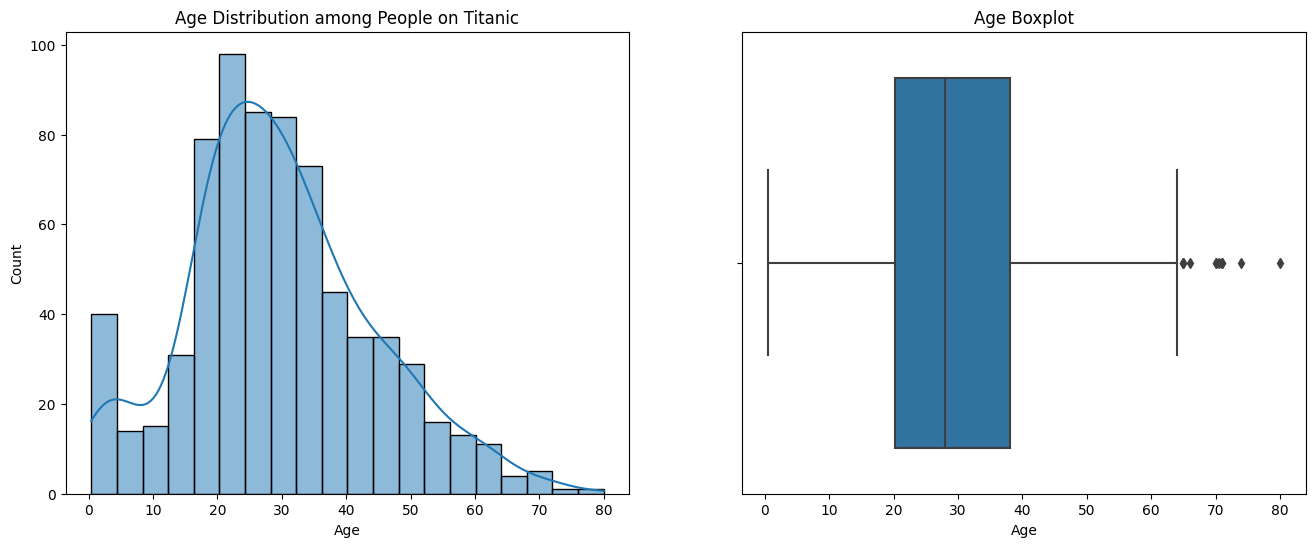

In [8]:
## Count table of age distribution with kernel density estimate plot in train data sample
fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.histplot(ax=ax[0], data=dftrain, x=dftrain["Age"],kde=True).set( title="Age Distribution among People on Titanic")
## The age distribution looks pretty normal, does not necessarily require standard scaler.

## Boxplot showing age skewness
sns.boxplot(ax=ax[1],x=dftrain["Age"])
plt.title("Age Boxplot")
## Since the solution to missing value is to impute rather than to drop given 20% missing value for age. Boxplot gives a good view of right skewness, saying a few very old people, which makes mean age higher than median age, and thus mean represents less the total population than median.
## In conclusion, we would choose median to impute

Adult    561
Young    113
Old       40
Name: AgeGroup, dtype: int64


Text(0.5, 1.0, 'Pie Chart by Age Group')

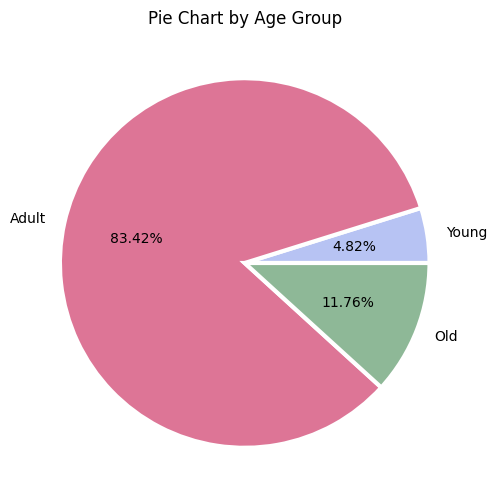

In [9]:
## Pie chart showing three groups of young, adult and old
labels = ['Young','Adult','Old']
dftrain['AgeGroup'] = pd.cut(dftrain['Age'],
                   (0,17,55,81) , 
                   labels=labels)
print(dftrain['AgeGroup'].value_counts())
colors = ['#B7C3F3', '#DD7596', '#8EB897']
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(dftrain.groupby(['AgeGroup'])['Age'].sum(), labels=labels, autopct='%1.2f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors)
plt.title("Pie Chart by Age Group")

S    644
C    168
Q     77
Name: Embarked, dtype: int64


[Text(0.5, 1.0, 'Passenger Groups by Embarkation')]

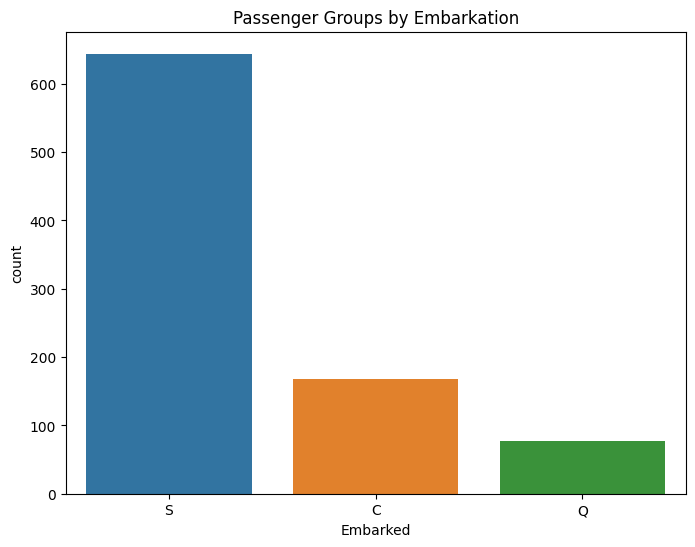

In [10]:
## Count table of age distribution with kernel density estimate plot in train data sample
print(dftrain['Embarked'].value_counts())
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=dftrain, x=dftrain["Embarked"]).set( title="Passenger Groups by Embarkation")
## Most people embarked from the port of Southamption, then followed by port of Cherbourg and Queenstown. This potentially reveals different chance for survival for passengers of different origins (C = Cherbourg, Q = Queenstown, S = Southampton).

In [11]:
## Extra Variable Creations and Manipulations
## Adding median age into cells with missing values (mean age is greater than median age, the age distribution skewness concerns overestimation of sample population age, thus choosing smaller age to fill in)
## Dropping Cabin
dftrain1 = dftrain.copy()
dftrain1["Age"] = dftrain["Age"].fillna(dftrain["Age"].median(skipna=True), inplace=True)
dftrain1 = pd.get_dummies(dftrain, columns=["Pclass","Sex","AgeGroup"])
dftrain1.dropna(how='any', axis=0, subset=["Embarked"], inplace=True)
dftrain1 = pd.get_dummies(dftrain1, columns=["Embarked"])
dftrain1.drop("Cabin",axis=1, inplace=True)
dftrain1.drop("Name", axis=1, inplace=True)
dftrain1.drop('Sex_female', axis=1, inplace=True)
dftrain1.drop("Ticket", axis=1, inplace=True)
print(dftrain1.isnull().sum())
dftrain1

PassengerId       0
Survived          0
Age               0
SibSp             0
Parch             0
Fare              0
Pclass_1          0
Pclass_2          0
Pclass_3          0
Sex_male          0
AgeGroup_Young    0
AgeGroup_Adult    0
AgeGroup_Old      0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
dtype: int64


,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,AgeGroup_Young,AgeGroup_Adult,AgeGroup_Old,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,1,0,1,0,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,1,0,1,0,1,0,0,0,1
887,888,1,19.0,0,0,30.0000,1,0,0,0,0,1,0,0,0,1
888,889,0,28.0,1,2,23.4500,0,0,1,0,0,0,0,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0,1,0,1,0,1,0,0


In [12]:
## same to test sample
labels = ['Young','Adult','Old']
dftest['AgeGroup'] = pd.cut(dftest['Age'],
                   (0,17,55,81) , 
                   labels=labels)
print(dftest['AgeGroup'].value_counts())
dftest1 = dftest.copy()
dftest1["Age"] = dftest["Age"].fillna(dftest["Age"].median(skipna=True), inplace=True)
dftest1 = pd.get_dummies(dftest, columns=["Embarked","Pclass","Sex","AgeGroup"])
dftest1.dropna(how='any', axis=0, subset=["Fare"], inplace=True)
dftest1.drop("Cabin", axis=1, inplace=True)
dftest1.drop("Name", axis=1, inplace=True)
dftest1.drop('Sex_female', axis=1, inplace=True)
dftest1.drop("Ticket", axis=1, inplace=True)
print(dftest1.isnull().sum())
dftest1

Adult    272
Young     41
Old       19
Name: AgeGroup, dtype: int64
PassengerId       0
Age               0
SibSp             0
Parch             0
Fare              0
Survived          0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Pclass_1          0
Pclass_2          0
Pclass_3          0
Sex_male          0
AgeGroup_Young    0
AgeGroup_Adult    0
AgeGroup_Old      0
dtype: int64


,PassengerId,Age,SibSp,Parch,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_male,AgeGroup_Young,AgeGroup_Adult,AgeGroup_Old
0,892,34.5,0,0,7.8292,0,0,1,0,0,0,1,1,0,1,0
1,893,47.0,1,0,7.0000,1,0,0,1,0,0,1,0,0,1,0
2,894,62.0,0,0,9.6875,0,0,1,0,0,1,0,1,0,0,1
3,895,27.0,0,0,8.6625,0,0,0,1,0,0,1,1,0,1,0
4,896,22.0,1,1,12.2875,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,27.0,0,0,8.0500,0,0,0,1,0,0,1,1,0,0,0
414,1306,39.0,0,0,108.9000,1,1,0,0,1,0,0,0,0,1,0
415,1307,38.5,0,0,7.2500,0,0,0,1,0,0,1,1,0,1,0
416,1308,27.0,0,0,8.0500,0,0,0,1,0,0,1,1,0,0,0


count    889.000000
mean      29.315152
std       12.984932
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


[Text(0.5, 1.0, 'Age Distribution among People on Titanic')]

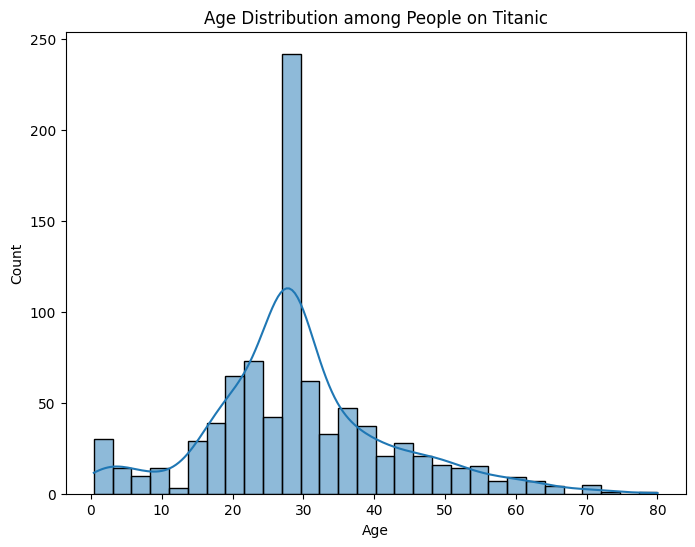

In [13]:
## Reflecting the effect of Age variable manipulation
print(dftrain1["Age"].describe())

fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=dftrain1, x=dftrain1["Age"],kde=True).set( title="Age Distribution among People on Titanic")

Text(0.5, 1.0, 'Age Density Distribution for Population Alive and Dead on Titanic')

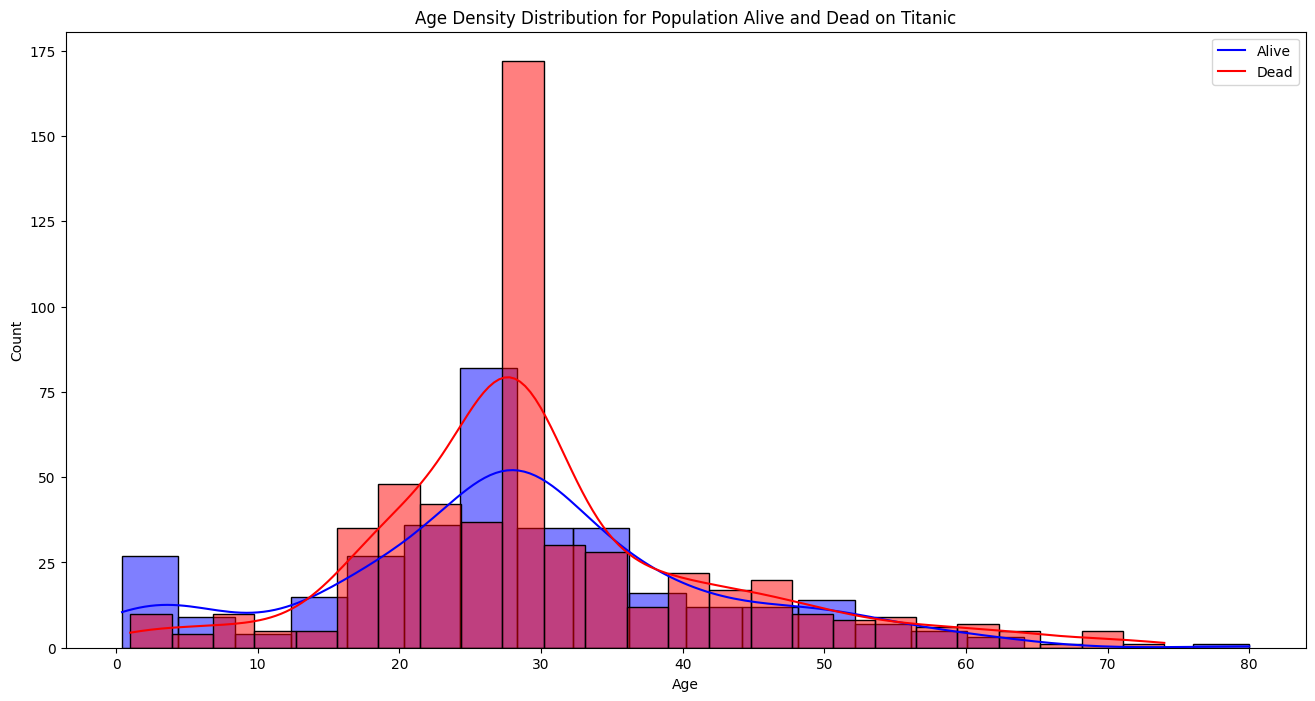

In [14]:
## Visualise the population information distribution between the survived and dead
## By Age
plt.figure(figsize=(16,8))
ax = sns.histplot(dftrain1["Age"][dftrain1.Survived == 1], color="blue", kde=True)
sns.histplot(dftrain1["Age"][dftrain1.Survived == 0], color="red", kde=True)
plt.legend(['Alive', 'Dead'])
plt.title('Age Density Distribution for Population Alive and Dead on Titanic')
## In training sample, more infants are alive than dead, while more adults are dead than alive, the numbers of death and survival are similar.

Text(0.5, 1.0, 'Ticket Class barplot for Population Alive and Dead on Titanic')

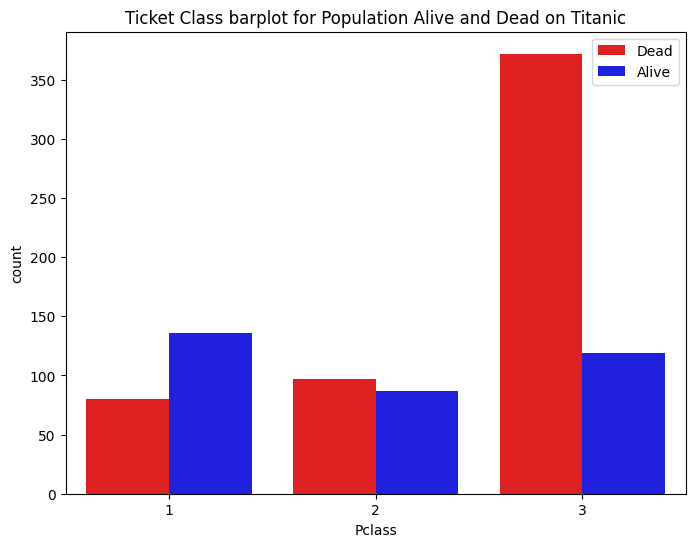

In [15]:
## by pclasss
ax = plt.figure(figsize=(8,6))
ax=sns.countplot(data=dftrain, x=dftrain["Pclass"],hue="Survived",palette=["red","blue"])
plt.legend(['Dead', 'Alive'])
plt.title('Ticket Class barplot for Population Alive and Dead on Titanic')

## Despite a few times bigger the 3rd class ticket holder is, there are more people in absolute number survived the Titanic with 1st class ticket than with 3rd class ticket.

Text(0.5, 1.0, 'Embarkation Port barplot for Population Alive and Dead on Titanic')

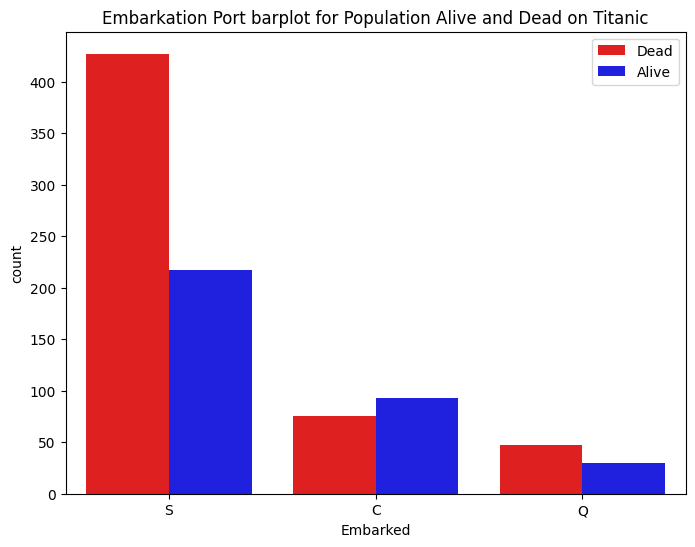

In [16]:
## by Embarked port
ax = plt.figure(figsize=(8,6))
ax=sns.countplot(data=dftrain, x=dftrain["Embarked"],hue="Survived",palette=["red","blue"])
plt.legend(['Dead', 'Alive'])
plt.title('Embarkation Port barplot for Population Alive and Dead on Titanic')

## French has better luck

Text(0.5, 1.0, 'Sex barplot for Population Alive and Dead on Titanic')

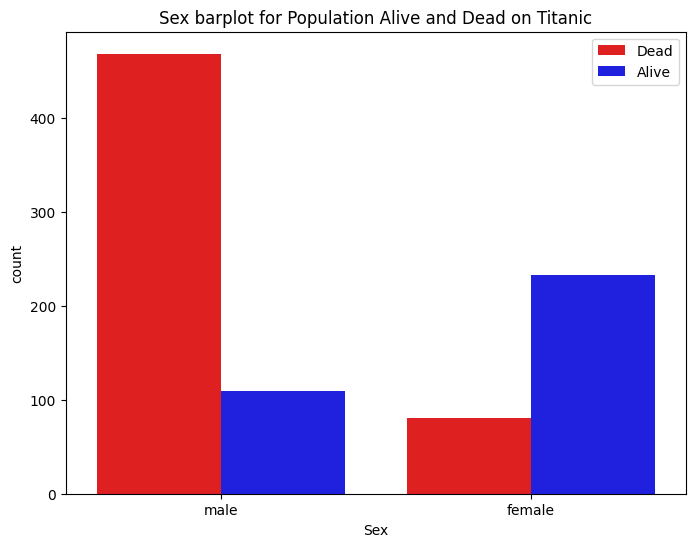

In [17]:
## by Embarked port
ax = plt.figure(figsize=(8,6))
ax=sns.countplot(data=dftrain, x=dftrain["Sex"],hue="Survived",palette=["red","blue"])
plt.legend(['Dead', 'Alive'])
plt.title('Sex barplot for Population Alive and Dead on Titanic')

## Being male is riskier on Titanic

<AxesSubplot: >

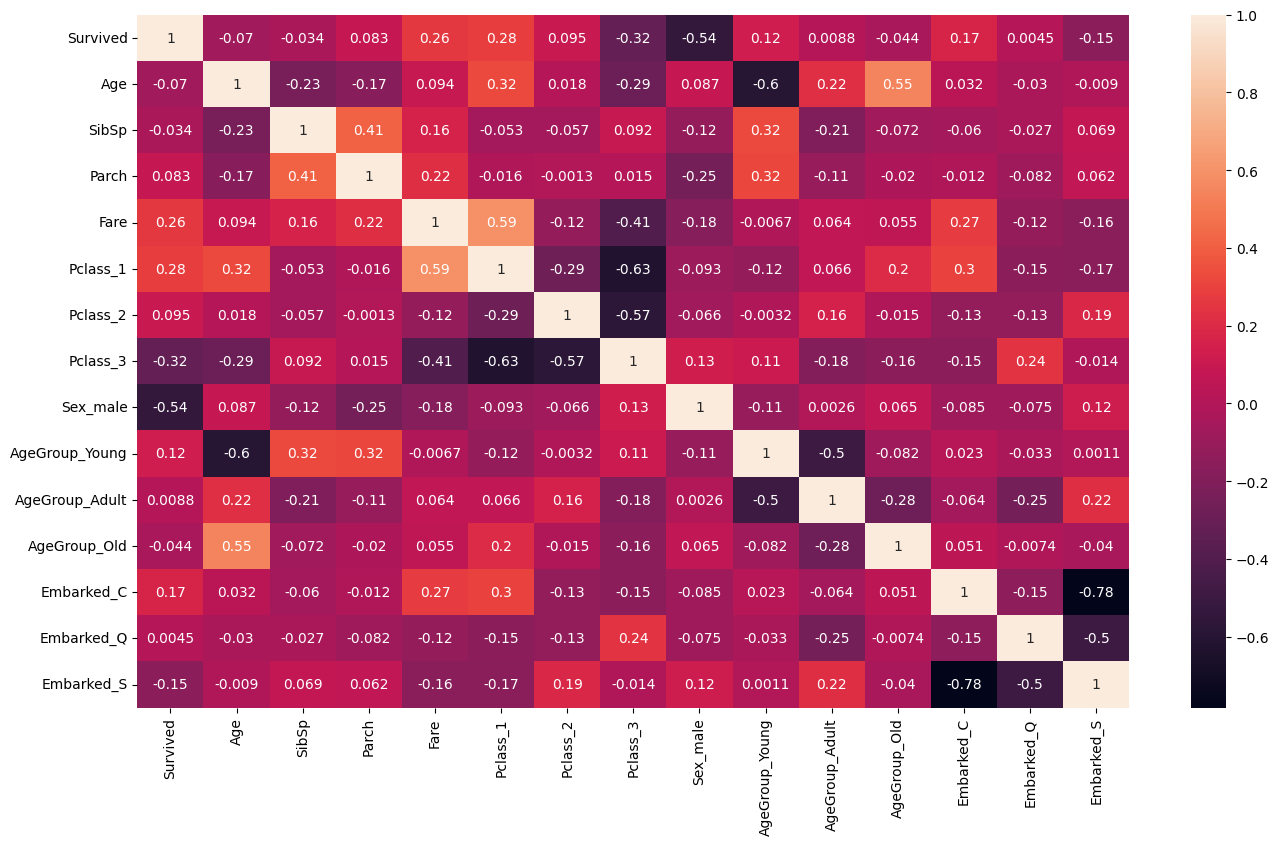

In [18]:
## Correlation Matrix of Estimators
dftrain1_corr = dftrain1.drop("PassengerId", axis=1)
corr_matrix = dftrain1_corr.corr()
corr_matrix
fig, ax=plt.subplots(figsize=(16,9))
sns.heatmap(corr_matrix, annot=True)

In [19]:
## Now Logsitic Regression
cols = ["Age","SibSp","Parch","Fare","Embarked_C","Embarked_S","Pclass_1","Pclass_3","Sex_male","AgeGroup_Adult","AgeGroup_Old"]
x_train = dftrain1[cols]
y_train = dftrain1['Survived']
x_test = dftest1[cols]
y_test = dftest1["Survived"]

## StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train=scaler.transform(x_train)
scaled_x_test=scaler.transform(x_test)

# Build a logreg and compute the feature importances
model = LogisticRegression(random_state=0, solver='lbfgs', max_iter=100)
model.fit(scaled_x_train, y_train)
y_pred = model.predict(scaled_x_test)
print(model.coef_)
## accuracy score
print(accuracy_score(y_test,y_pred))
## confusion matrix
mat = confusion_matrix(y_test, y_pred)
print(mat)
print(classification_report(y_test,y_pred))
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

[[-0.47908714 -0.35213143 -0.07353827  0.12157153  0.03526145 -0.15048757
   0.37735353 -0.60955665 -1.28170711 -0.04211153 -0.0102565 ]]
0.9424460431654677
[[251  14]
 [ 10 142]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       265
           1       0.91      0.93      0.92       152

    accuracy                           0.94       417
   macro avg       0.94      0.94      0.94       417
weighted avg       0.94      0.94      0.94       417



,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


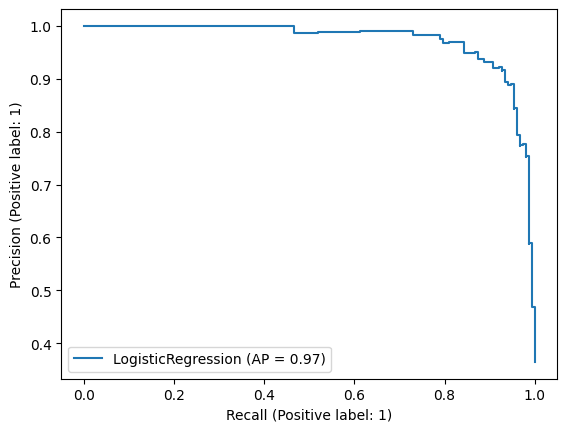

In [20]:
## precision recall curve
PrecisionRecallDisplay.from_estimator(model, scaled_x_test, y_test)

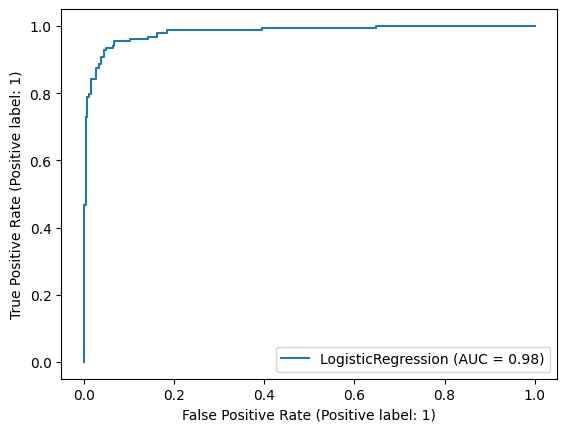

In [21]:
## ROC curve
RocCurveDisplay.from_estimator(model, scaled_x_test, y_test)